<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 📈Predicting 📀Optimal🎂 Fertilizers :</font></h3>
    


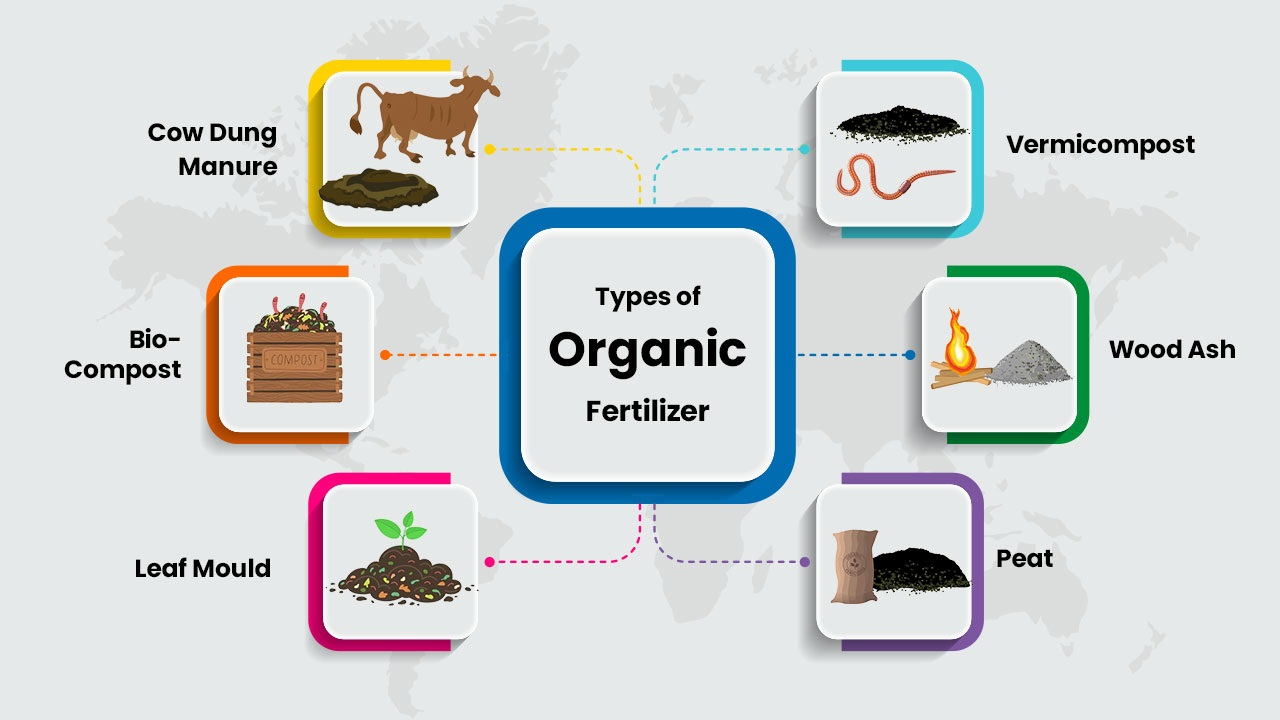
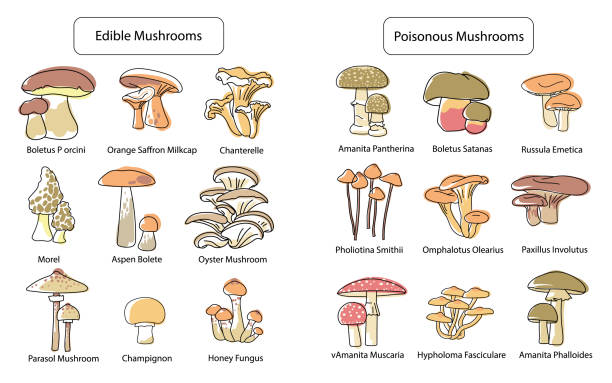

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: Predict the top 3 most suitable fertilizers for a given set of features related to weather, soil, and crop conditions.

**Dataset**:  train.csv: Training data with features and target Fertilizer Name.

test.csv: Test data without labels; predict top 3 fertilizers.

sample_submission.csv: Format example — each row should have:
    
**Evaluation**: Mean Average Precision at 3 (MAP@3)

Score is based on ranking the correct fertilizer label in the top 3 predictions.

Partial credit is given if the correct label appears at 2nd or 3rd position.

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import lightgbm as lgb
import gc
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Evalaution Metric</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgrey; font-size:100%; text-align:left">

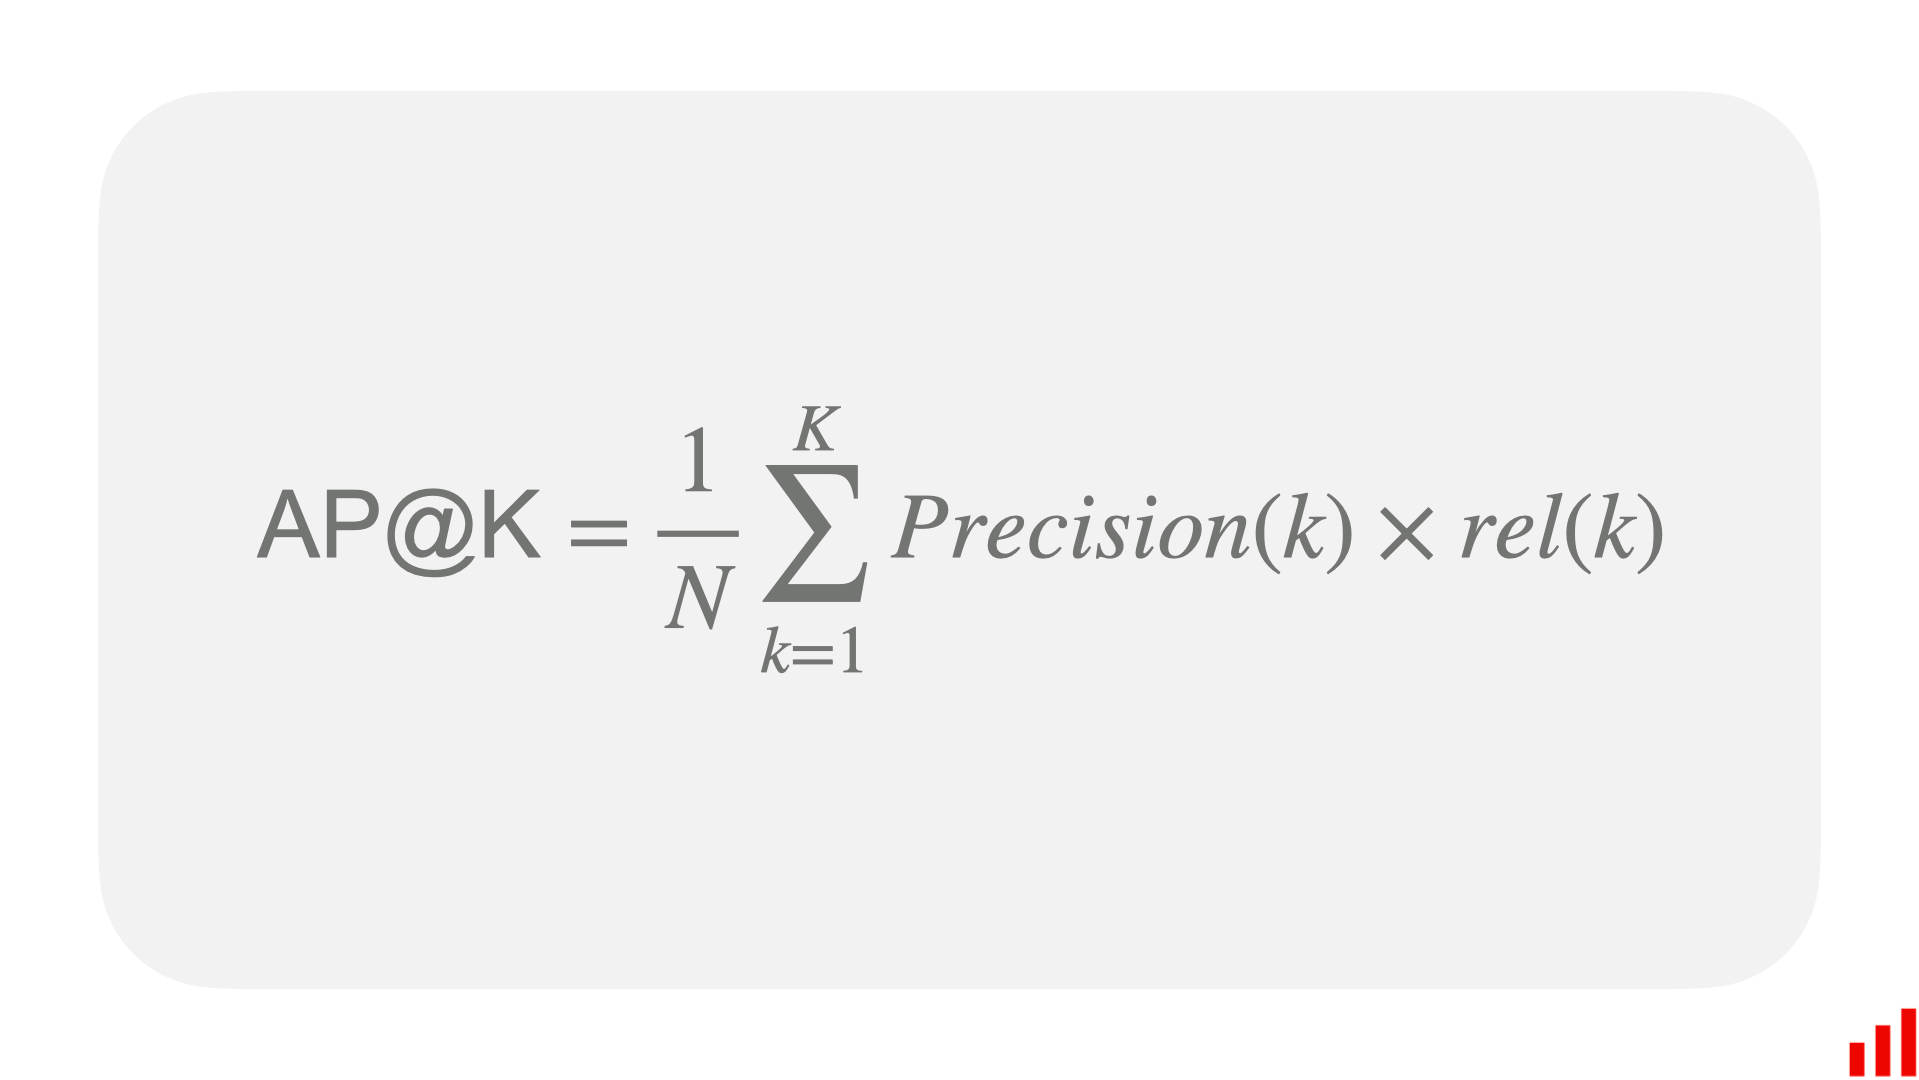      
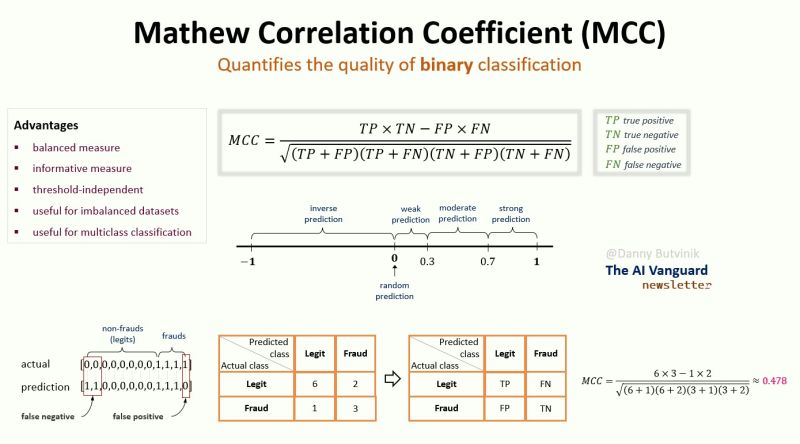
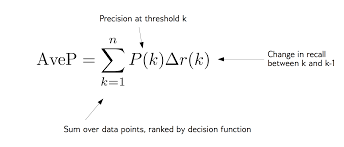
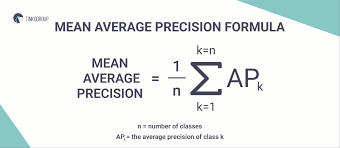

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Loading  Dataset ♒🌊</h1>  
     
</div>

In [ ]:
df_sub=pd.read_csv("/kaggle/input/playground-series-s5e6/sample_submission.csv")
df_train=pd.read_csv("/kaggle/input/playground-series-s5e6/train.csv")
df_test=pd.read_csv("/kaggle/input/playground-series-s5e6/test.csv")

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: grey; padding: 10px; border-radius: 10px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: blue; animation: pulse 2s infinite;">📉Check </span>
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> on Data  📊</span> 
</p>

In [ ]:
df_extra = pd.read_csv('/kaggle/input/d/irakozekelly/fertilizer-prediction/Fertilizer Prediction.csv')

In [ ]:
df_extra.columns,df_train.columns

In [ ]:
df_train.head()

In [ ]:
df_test.head()

In [ ]:
df_test.shape,df_train.shape

In [ ]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [ ]:
df_train = pd.concat([df_train, df_extra], ignore_index=True)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>Data Talks :</font></h3>
    
**Intial Drop** : Drop Column ID....🎃
    
**Train & Test Distribution** : 🎆    
    
**About Feature Columns** :  🎭

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: grey; padding: 10px; border-radius: 10px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: blue; animation: pulse 2s infinite;">📉Checking  </span>
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> Distribution of categorical features  📊</span> 
</p>

In [ ]:
df_train.info()

In [ ]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
unique_values = {col: df_train[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

In [ ]:
categorical_columns = df_test.select_dtypes(include=['object']).columns
unique_values = {col: df_test[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

In [ ]:
df_test.columns

In [ ]:
df_train.columns

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: black; padding: 20px; border-radius: 20px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: blue; animation: pulse 2s infinite;">📉Exploratory</span>
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> Data Analysis(EDA)  📊</span> 
</p>

In [ ]:
import seaborn as sns

In [ ]:
missing_train = df_train.isna().mean() * 100
missing_test = df_test.isna().mean() * 100

print("Columns in df_train with more than 10% missing values:")
print(missing_train[missing_train > 0])

print("\nColumns in df_test with more than 10% missing values:")
print(missing_test[missing_test > 0])

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>Data Talks :</font></h3>
    
**Common Columns:** 
    
**High Missing Values:**🎃
    
**Moderate Missing Values:**  🎭

In [ ]:
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Missing Values')
    plt.title('Missing Values per Feature')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found in the dataset.")

In [ ]:
!pip install dython

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import category_encoders as ce

missing_threshold = 0.95

high_missing_columns = df_train.columns[df_train.isnull().mean() > missing_threshold]

df_train = df_train.drop(columns=high_missing_columns)
df_test = df_test.drop(columns=high_missing_columns)
target = 'class'

for column in df_train.columns:
    if df_train[column].isnull().any():      
        if df_train[column].dtype == 'object':
            mode_value = df_train[column].mode()[0]
            df_train[column].fillna(mode_value, inplace=True)
            df_test[column].fillna(mode_value, inplace=True)     
        else:
            median_value = df_train[column].median()
            df_train[column].fillna(median_value, inplace=True)
            df_test[column].fillna(median_value, inplace=True)

In [ ]:
from dython.nominal import associations

associations_df = associations(df_train[:10000], nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

In [ ]:
df_train.columns

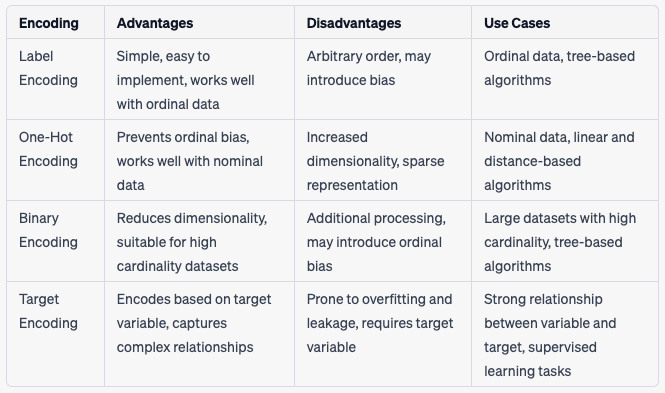

In [ ]:
cat_cols_train = df_train.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'Fertilizer Name']
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df_train[cat_cols_train] = ordinal_encoder.fit_transform(df_train[cat_cols_train].astype(str))
df_test[cat_cols_train] = ordinal_encoder.transform(df_test[cat_cols_train].astype(str))

In [ ]:
df_train.head()

In [ ]:
df_test.head()

In [ ]:
le = LabelEncoder()
df_train['Fertilizer Name'] = le.fit_transform(df_train['Fertilizer Name'])

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    


In [ ]:
y = df_train['Fertilizer Name'] 
X = df_train.drop(['Fertilizer Name'],axis=1)

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: cyan; padding: 20px; border-radius: 20px; border: 7px solid #2ca02c; width: 95%;">
  <span style="font-weight: bold; color: #ff7f0e; animation: pulse 2s infinite;"></span>Model Building |
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> Training |</span> Classification

</p>

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.2, random_state =42,stratify=y)

In [ ]:
params = {
        'objective': 'multi:softprob',  
        'num_class': len(np.unique(y)), 
        'max_depth': 7,
        'learning_rate': 0.03,
        'subsample': 0.8,
        'max_bin': 128,
        'colsample_bytree': 0.3, 
        'colsample_bylevel': 1,  
        'colsample_bynode': 1,  
        'tree_method': 'hist',  
        'random_state': 42,
        'eval_metric': 'mlogloss',
        'device': "cuda",
        'enable_categorical':True,
        'n_estimators':10000,
        'early_stopping_rounds':50,
    }

In [ ]:
model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(train_y)),
    n_estimators=3200,
    learning_rate=0.045,         
    max_depth=7,                
    colsample_bytree=0.6,       
    colsample_bylevel=0.8,      
    subsample=0.8,
)
model.fit(train_X, train_y)
y_pred_probs = model.predict_proba(test_X)
top_3_preds = np.argsort(y_pred_probs, axis=1)[:, -3:][:, ::-1]  
actual = [[label] for label in test_y]

def mapk(actual, predicted, k=3):
    def apk(a, p, k):
        p = p[:k]
        score = 0.0
        hits = 0
        seen = set()
        for i, pred in enumerate(p):
            if pred in a and pred not in seen:
                hits += 1
                score += hits / (i + 1.0)
                seen.add(pred)
        return score / min(len(a), k)
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])
map3_score = mapk(actual, top_3_preds)
print(f"✅ MAP@3 Score: {map3_score:.5f}")

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Classification Analysis♒🌊</h1>  
     
</div>

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
redict_fn_xgb = lambda x: model.predict_proba(x).astype(float)
X = train_X.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = train_X.columns,kernel_width=5)

In [ ]:
df_test.head(4)

In [ ]:
df_test.loc[[3]]

In [ ]:
test_X

In [ ]:
choosen_instance = test_X.loc[[15066]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_xgb,num_features=15)
exp.show_in_notebook(show_all=False)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🗞📜Final Submission♒🌊</h1>  
     
</div>

In [ ]:
test_probs = model.predict_proba(df_test)
top_3_preds = np.argsort(test_probs, axis=1)[:, -3:][:, ::-1]
top_3_labels = le.inverse_transform(top_3_preds.ravel()).reshape(top_3_preds.shape)
submission = pd.DataFrame({
    'id': df_sub['id'],
    'Fertilizer Name': [' '.join(row) for row in top_3_labels]
})
submission.to_csv('submission.csv', index=False)
print("✅ Submission file saved as 'submission.csv'")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡Refrences :</font></h3>

<div style="background-color: black; padding: 20px; border-radius: 10px; margin: 20px auto; max-width: 600px;">
    <center>
        <div style="background-color: white; padding: 20px; border-radius: 10px;">
            <b style="font-size: 24px; color: #ff6600;">👏😊 &nbsp; IF YOU FIND THIS HELPFUL, PLEASE UPVOTE! &nbsp; 💢👏</b>
            <div style="margin-top: 20px; font-size: 18px; color: black;">
                🥽🖥This took quite a bit of effort on my part, and while it might seem trivial, 🏆🏆receiving your appreciation means a lot to me! 😅🎃 Your upvotes inspire me to keep creating helpful content like this🖥🍱.                    
            </div>
        </div>
    </center>
</div>